In [5]:
# Transit data analysis
## This file is used for analysis of simulation results in the spatiotemporal transit project
## By: Laure Briol aided by Generative AI (ChatGPT)

In [6]:
#import statements
#pandas is used to read in data
import pandas as pd
#matplotlib is used to create graphs
import matplotlib.pyplot as plt
#numpy is used to perform math
import numpy as np
#seaborn is used to assist matplot lib in creating graphs like a violin chart
import seaborn as sns

In [7]:
#this reads the simulation results csv file and prints it below
data = pd.read_csv("combined_simulation_output.csv")
data

,route_index,departure_mode,original_departure_time,google_departure_time,anticipated_arrival_time,actual_arrival_time,anticipated_travel_time_minutes,actual_travel_time_minutes,time_spent_walking_minutes,time_spent_in_transit_minutes,time_waiting_to_leave_minutes,time_waiting_initial_transit_minutes,time_waiting_transfers_minutes,completed,steps
0,0,immediate,2024-10-23 06:00:00,2024-10-23 06:12:57,2024-10-23 06:26:47,2024-10-23 06:38:43,26.27,38.20,5.95,20.00,0.00,12.25,0.0,True,"[{""distance"": {""text"": ""0.2 mi"", ""value"": 392}..."
1,0,scheduled,2024-10-23 06:00:00,2024-10-23 06:12:57,2024-10-23 06:39:13,2024-10-23 06:38:09,26.27,25.20,5.95,19.25,12.95,0.00,0.0,True,"[{""distance"": {""text"": ""0.2 mi"", ""value"": 392}..."
2,1,immediate,2024-10-23 06:00:00,2024-10-23 06:26:57,2024-10-23 06:27:47,2024-10-23 06:38:43,27.27,38.20,5.95,20.00,0.00,12.25,0.0,True,"[{""distance"": {""text"": ""0.2 mi"", ""value"": 392}..."
3,1,scheduled,2024-10-23 06:00:00,2024-10-23 06:26:57,2024-10-23 06:54:13,2024-10-23 07:19:09,27.27,52.20,5.95,22.50,26.95,23.75,0.0,True,"[{""distance"": {""text"": ""0.2 mi"", ""value"": 392}..."
4,2,immediate,2024-10-23 06:00:00,2024-10-23 06:00:44,2024-10-23 06:38:25,2024-10-23 06:38:38,37.90,38.12,21.87,14.25,0.00,2.00,0.0,True,"[{""distance"": {""text"": ""0.8 mi"", ""value"": 1262..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,3,scheduled,2024-11-05 19:00:00,2024-11-05 19:19:41,2024-11-05 19:56:00,NaN,36.32,NaN,5.22,52.25,19.68,0.50,8.5,False,"[{""distance"": {""text"": ""0.2 mi"", ""value"": 321}..."
1970,4,immediate,2024-11-05 19:00:00,2024-11-05 19:33:46,2024-11-05 19:33:25,2024-11-05 19:41:25,33.03,41.03,8.03,25.75,0.00,7.25,0.0,True,"[{""distance"": {""text"": ""210 ft"", ""value"": 64},..."
1971,4,scheduled,2024-11-05 19:00:00,2024-11-05 19:33:46,2024-11-05 20:06:48,2024-11-05 20:09:18,33.03,35.53,8.03,23.75,33.77,3.75,0.0,True,"[{""distance"": {""text"": ""210 ft"", ""value"": 64},..."
1972,5,immediate,2024-11-05 19:00:00,2024-11-05 19:48:46,2024-11-05 19:33:25,2024-11-05 19:41:25,33.03,41.03,8.03,25.75,0.00,7.25,0.0,True,"[{""distance"": {""text"": ""210 ft"", ""value"": 64},..."


In [8]:
#this is an example to test if we can look at certain sections of the data
#lets look at only the routes that sucessfully completed the simulation
sucessful_sims = data[data["completed"] == True]
sucessful_sims

,route_index,departure_mode,original_departure_time,google_departure_time,anticipated_arrival_time,actual_arrival_time,anticipated_travel_time_minutes,actual_travel_time_minutes,time_spent_walking_minutes,time_spent_in_transit_minutes,time_waiting_to_leave_minutes,time_waiting_initial_transit_minutes,time_waiting_transfers_minutes,completed,steps
0,0,immediate,2024-10-23 06:00:00,2024-10-23 06:12:57,2024-10-23 06:26:47,2024-10-23 06:38:43,26.27,38.20,5.95,20.00,0.00,12.25,0.0,True,"[{""distance"": {""text"": ""0.2 mi"", ""value"": 392}..."
1,0,scheduled,2024-10-23 06:00:00,2024-10-23 06:12:57,2024-10-23 06:39:13,2024-10-23 06:38:09,26.27,25.20,5.95,19.25,12.95,0.00,0.0,True,"[{""distance"": {""text"": ""0.2 mi"", ""value"": 392}..."
2,1,immediate,2024-10-23 06:00:00,2024-10-23 06:26:57,2024-10-23 06:27:47,2024-10-23 06:38:43,27.27,38.20,5.95,20.00,0.00,12.25,0.0,True,"[{""distance"": {""text"": ""0.2 mi"", ""value"": 392}..."
3,1,scheduled,2024-10-23 06:00:00,2024-10-23 06:26:57,2024-10-23 06:54:13,2024-10-23 07:19:09,27.27,52.20,5.95,22.50,26.95,23.75,0.0,True,"[{""distance"": {""text"": ""0.2 mi"", ""value"": 392}..."
4,2,immediate,2024-10-23 06:00:00,2024-10-23 06:00:44,2024-10-23 06:38:25,2024-10-23 06:38:38,37.90,38.12,21.87,14.25,0.00,2.00,0.0,True,"[{""distance"": {""text"": ""0.8 mi"", ""value"": 1262..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,1,scheduled,2024-11-05 19:00:00,2024-11-05 19:18:46,2024-11-05 19:51:48,2024-11-05 19:52:03,33.03,33.28,8.03,25.25,18.77,0.00,0.0,True,"[{""distance"": {""text"": ""210 ft"", ""value"": 64},..."
1970,4,immediate,2024-11-05 19:00:00,2024-11-05 19:33:46,2024-11-05 19:33:25,2024-11-05 19:41:25,33.03,41.03,8.03,25.75,0.00,7.25,0.0,True,"[{""distance"": {""text"": ""210 ft"", ""value"": 64},..."
1971,4,scheduled,2024-11-05 19:00:00,2024-11-05 19:33:46,2024-11-05 20:06:48,2024-11-05 20:09:18,33.03,35.53,8.03,23.75,33.77,3.75,0.0,True,"[{""distance"": {""text"": ""210 ft"", ""value"": 64},..."
1972,5,immediate,2024-11-05 19:00:00,2024-11-05 19:48:46,2024-11-05 19:33:25,2024-11-05 19:41:25,33.03,41.03,8.03,25.75,0.00,7.25,0.0,True,"[{""distance"": {""text"": ""210 ft"", ""value"": 64},..."


In [9]:
#this is calculating different overall satistics about the data
#mean and standard deviations of travel times
avg_estimated_time = data["anticipated_travel_time_minutes"].mean()
avg_actual_time = data["actual_travel_time_minutes"].mean()
std_estimated_time = data["anticipated_travel_time_minutes"].std()
std_actual_time = data["actual_travel_time_minutes"].std()

print(avg_estimated_time, avg_actual_time, std_estimated_time, std_actual_time)

35.600283687942756 43.73045540796887 6.4717507954498075 8.604191746774196


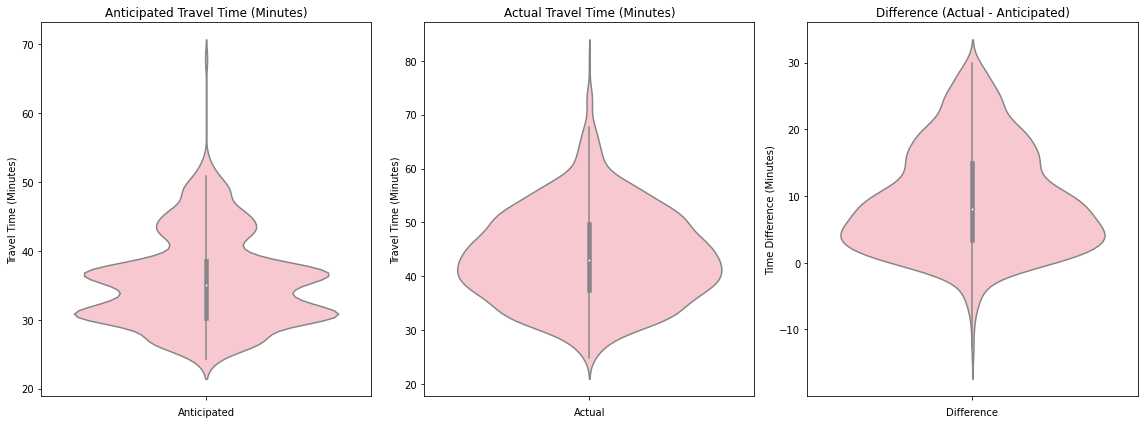

In [10]:
#calculate the difference between actual and anticipated travel times
data['travel_time_difference'] = data['actual_travel_time_minutes'] - data['anticipated_travel_time_minutes']

#set up the matplotlib figure to be 16 by 6 squares in size
plt.figure(figsize=(16, 6))

#create violin plot for anticipated_travel_time_minutes
plt.subplot(1, 3, 1)
sns.violinplot(data=data, y='anticipated_travel_time_minutes', color="pink")
plt.title('Anticipated Travel Time (Minutes)')
plt.ylabel('Travel Time (Minutes)')
plt.xlabel('Anticipated')

#create violin plot for actual_travel_time_minutes
plt.subplot(1, 3, 2)
sns.violinplot(data=data, y='actual_travel_time_minutes', color="pink")
plt.title('Actual Travel Time (Minutes)')
plt.ylabel('Travel Time (Minutes)')
plt.xlabel('Actual')

#create violin plot for the difference
plt.subplot(1, 3, 3)
sns.violinplot(data=data, y='travel_time_difference', color="pink")
plt.title('Difference (Actual - Anticipated)')
plt.ylabel('Time Difference (Minutes)')
plt.xlabel('Difference')

#adjust layout and display the plots
plt.tight_layout()
plt.show()

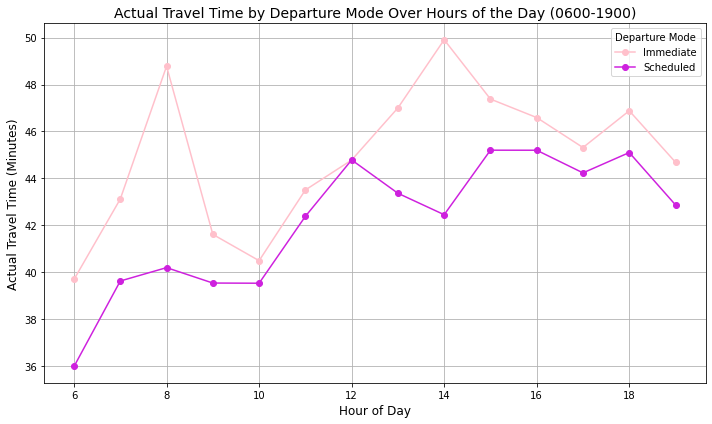

In [11]:
#convert time columns to datetime for analysis
data['original_departure_time'] = pd.to_datetime(data['original_departure_time'])

#extract the hour of the day from the departure time
data['hour_of_day'] = data['original_departure_time'].dt.hour

#filter data for the specific time range (0600 to 1900 hours)
filtered_data = data[(data['hour_of_day'] >= 6) & (data['hour_of_day'] <= 19)]

#group by hour and departure mode to calculate the mean actual travel time
mean_travel_time = filtered_data.groupby(['hour_of_day', 'departure_mode'])['actual_travel_time_minutes'].mean().unstack()

#plot the data
plt.figure(figsize=(10, 6))
plt.plot(mean_travel_time.index, mean_travel_time['immediate'], label='Immediate', marker='o', color='pink')
plt.plot(mean_travel_time.index, mean_travel_time['scheduled'], label='Scheduled', marker='o', color='#ce21de')

#add labels, legend, and title
plt.title('Actual Travel Time by Departure Mode Over Hours of the Day (0600-1900)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Actual Travel Time (Minutes)', fontsize=12)
plt.legend(title='Departure Mode', fontsize=10)
plt.grid(True)

#display the plot
plt.tight_layout()
plt.show()
